In [ ]:
'''
Python project by Andrew Kim 

Goal is to use the NBA data from Kaggle and predict the average amount of points scored per year for each of the basketball
positions (PG, SG, SF, PF, C). I predict that the average points scored will go up, but the curve will be steeper for
all of the positions except for the center. 

'''

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection, metrics

In [2]:
stats1 = pd.read_csv("1950-2017/Seasons_Stats.csv", index_col=0)

In [3]:
stats1.head(12)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [4]:
#Get points per game average for each player

stats1["PtsAverage"] = round((stats1["PTS"]/stats1["G"]), 1)

In [5]:
stats1.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PtsAverage
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,7.3
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,5.7
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,6.5
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,4.2
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,4.5
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,2.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0,14.9
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0,3.3
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0,10.2
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0,10.6


In [6]:
# Use players who played from the 2000-2001 season only

stats1 = stats1[stats1["Year"] >= 2000.0]

In [7]:
stats1.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PtsAverage
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0,11.4
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0,12.2
14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0,8.9
14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0,20.3
14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0,2.8
14475,2000.0,Ray Allen,SG,24.0,MIL,82.0,82.0,3070.0,20.6,0.570,...,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0,22.1
14476,2000.0,Rafer Alston,PG,23.0,MIL,27.0,0.0,361.0,4.3,0.310,...,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0,2.2
14477,2000.0,John Amaechi,C,29.0,ORL,80.0,53.0,1684.0,13.2,0.505,...,62.0,204.0,266.0,95.0,35.0,37.0,139.0,161.0,836.0,10.4
14478,2000.0,Derek Anderson,SG,25.0,LAC,64.0,58.0,2201.0,16.9,0.542,...,80.0,178.0,258.0,220.0,90.0,11.0,167.0,149.0,1080.0,16.9
14479,2000.0,Kenny Anderson,PG,29.0,BOS,82.0,82.0,2593.0,17.4,0.524,...,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0,14.0


<AxesSubplot:>

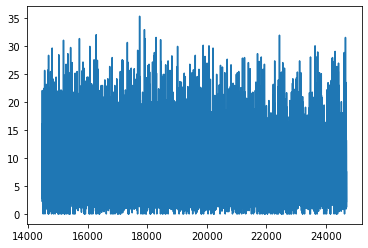

In [8]:
stats1["PtsAverage"].plot()

In [8]:
# Average points scored per year before filtering 

average_points = stats1.groupby("Year")["PtsAverage"].describe()

In [9]:
average_points

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,496.0,7.679839,5.775385,0.0,3.100,6.30,10.900,29.7
2001.0,537.0,7.420857,5.815584,0.0,3.300,5.90,9.900,31.1
2002.0,500.0,7.873200,5.884588,0.0,3.400,6.40,11.100,31.4
2003.0,483.0,7.752795,6.059947,0.0,3.200,6.00,10.500,32.1
2004.0,585.0,7.392821,5.648322,0.0,3.200,5.90,10.300,28.0
2005.0,585.0,7.777607,5.935405,0.0,3.200,6.20,11.000,30.7
2006.0,563.0,7.646714,6.148113,0.0,2.900,5.80,11.000,35.4
2007.0,516.0,8.085853,6.296809,0.0,3.075,6.40,11.425,31.6
2008.0,595.0,7.549916,5.855762,0.0,3.000,6.00,10.700,30.0


In [10]:
# Iterate over rows of the table. If Tm = TOT, get the index of that row, then delete the next two rows

def totalOnly(df):
    for index, row in df.iterrows():
        if (row["Tm"] == "TOT"):
            #print (index)
            df.drop([index + 1, index + 2], inplace = True)
totalOnly(stats1)

In [11]:
'''
Result of the table. Note how Deron Williams, Derrick Williams, and Lou Williams's stats only show the total and
not the next two rows 
'''

stats1 = stats1.filter(["Year", "Player", "Pos", "Tm", "PtsAverage"])
stats1.tail(25)

,Year,Player,Pos,Tm,PtsAverage
24658,2017.0,Andrew Wiggins,SF,MIN,23.6
24659,2017.0,C.J. Wilcox,SG,ORL,1.0
24660,2017.0,Alan Williams,C,PHO,7.4
24661,2017.0,Deron Williams,PG,TOT,11.0
24664,2017.0,Derrick Williams,PF,TOT,6.1
24667,2017.0,Lou Williams,SG,TOT,17.5
24670,2017.0,Marvin Williams,PF,CHO,11.2
24671,2017.0,Reggie Williams,SF,NOP,4.5
24672,2017.0,Troy Williams,SF,TOT,6.2
24675,2017.0,Kyle Wiltjer,PF,HOU,0.9


In [12]:
# Average points scored per year after filtering

average_points = stats1.groupby("Year")["PtsAverage"].describe()
average_points

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,440.0,7.960909,5.797487,0.0,3.475,6.60,11.425,29.7
2001.0,443.0,7.791422,6.013783,0.0,3.350,6.10,10.550,31.1
2002.0,440.0,7.981364,5.902300,0.0,3.400,6.50,11.200,31.4
2003.0,429.0,7.829371,6.068928,0.0,3.400,6.10,10.500,32.1
2004.0,449.0,7.733408,5.801481,0.0,3.400,6.00,10.900,28.0
2005.0,467.0,8.057816,6.051134,0.0,3.500,6.40,11.350,30.7
2006.0,461.0,7.946204,6.296083,0.0,3.000,6.20,11.500,35.4
2007.0,458.0,8.207642,6.288172,0.0,3.100,6.40,11.600,31.6
2008.0,459.0,8.184314,6.105028,0.0,3.500,6.70,11.600,30.0


In [107]:
# Points guards only

stats1_PG = stats1[stats1["Pos"] == "PG"]

In [108]:
stats1_PG.head(15)

,Year,Player,Pos,Tm,PtsAverage
14474,2000.0,Cory Alexander,PG,DEN,2.8
14476,2000.0,Rafer Alston,PG,MIL,2.2
14479,2000.0,Kenny Anderson,PG,BOS,14.0
14483,2000.0,Greg Anthony,PG,POR,6.3
14484,2000.0,B.J. Armstrong,PG,CHI,7.4
14485,2000.0,Darrell Armstrong,PG,ORL,16.2
14486,2000.0,Chucky Atkins,PG,ORL,9.5
14490,2000.0,William Avery,PG,MIN,2.6
14494,2000.0,Dana Barros,PG,BOS,7.2
14496,2000.0,Drew Barry,PG,TOT,2.6


In [109]:
describe_PG = stats1_PG.groupby("Year")["PtsAverage"].describe()
describe_PG

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,94.0,7.396809,4.786034,0.0,4.000,6.40,9.275,24.2
2001.0,101.0,7.064356,5.055741,0.0,3.400,6.00,9.400,23.9
2002.0,86.0,7.712791,5.188716,0.0,3.525,6.65,11.050,22.1
2003.0,86.0,7.817442,5.550033,0.0,3.550,6.45,10.650,22.3
2004.0,84.0,7.658333,5.431240,0.8,3.375,6.10,10.675,22.9
2005.0,86.0,8.469767,6.016156,0.0,3.850,6.80,11.875,30.7
2006.0,92.0,8.338043,6.455321,0.0,3.150,7.50,12.100,33.0
2007.0,83.0,8.308434,5.494836,0.0,4.000,6.40,12.150,28.4
2008.0,86.0,8.452326,4.926894,1.0,4.850,7.70,11.425,21.8


Text(0, 0.5, 'Average points')

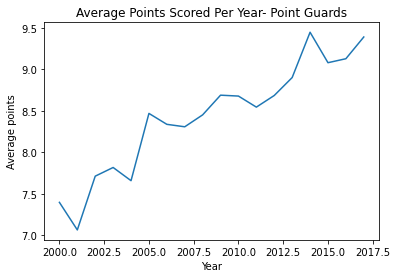

In [110]:
average_PG = stats1_PG.groupby("Year")["PtsAverage"].mean()
a = average_PG.plot()
a.set_title("Average Points Scored Per Year- Point Guards")
a.set_xlabel("Year")
a.set_ylabel("Average points")

In [111]:
# Shooting guards only

stats1_SG = stats1[stats1["Pos"] == "SG"]
stats1_SG.head(15)

,Year,Player,Pos,Tm,PtsAverage
14470,2000.0,Tariq Abdul-Wahad,SG,TOT,11.4
14475,2000.0,Ray Allen,SG,MIL,22.1
14478,2000.0,Derek Anderson,SG,LAC,16.9
14480,2000.0,Nick Anderson,SG,SAC,10.8
14487,2000.0,Stacey Augmon,SG,POR,3.4
14491,2000.0,Toby Bailey,SG,PHO,3.5
14495,2000.0,Brent Barry,SG,SEA,11.8
14499,2000.0,Jon Barry,SG,SAC,8.0
14503,2000.0,Corey Benjamin,SG,CHI,7.7
14507,2000.0,Chauncey Billups,SG,DEN,8.6


In [112]:
describe_SG = stats1_SG.groupby("Year")["PtsAverage"].describe()
describe_SG

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,73.0,9.568493,6.309338,0.3,4.700,7.90,13.600,28.4
2001.0,69.0,10.076812,7.114756,1.0,4.800,9.10,12.300,31.1
2002.0,86.0,9.166279,6.846564,0.3,4.025,7.45,12.150,31.4
2003.0,80.0,9.191250,7.387968,1.2,3.250,7.40,12.700,32.1
2004.0,77.0,9.853247,6.927834,0.2,4.500,7.90,14.000,28.0
2005.0,92.0,8.665217,6.066942,0.0,4.450,6.80,11.800,27.6
2006.0,85.0,8.804706,6.910239,0.0,3.600,7.50,11.200,35.4
2007.0,92.0,9.794565,7.074725,0.0,4.175,7.85,13.575,31.6
2008.0,90.0,9.553333,6.879757,0.8,4.100,8.10,12.500,28.3


Text(0, 0.5, 'Average points')

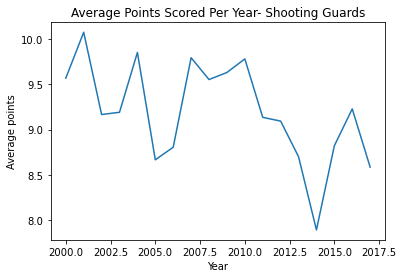

In [113]:
average_SG = stats1_SG.groupby("Year")["PtsAverage"].mean()
b = average_SG.plot()
b.set_title("Average Points Scored Per Year- Shooting Guards")
b.set_xlabel("Year")
b.set_ylabel("Average points")

In [114]:
# Small forwards only

stats1_SF = stats1[stats1["Pos"] == "SF"]
stats1_SF.head(15)

,Year,Player,Pos,Tm,PtsAverage
14473,2000.0,Shareef Abdur-Rahim,SF,VAN,20.3
14481,2000.0,Shandon Anderson,SF,HOU,12.3
14501,2000.0,Jonathan Bender,SF,IND,2.7
14515,2000.0,Lazaro Borrell,SF,SEA,3.6
14516,2000.0,Cal Bowdler,SF,ATL,2.7
14517,2000.0,Bruce Bowen,SF,TOT,2.8
14520,2000.0,Ryan Bowen,SF,DEN,2.5
14540,2000.0,Jud Buechler,SF,DET,2.2
14543,2000.0,Scott Burrell,SF,NJN,6.1
14548,2000.0,Antoine Carr,SF,VAN,3.2


In [115]:
describe_SF = stats1_SF.groupby("Year")["PtsAverage"].describe()
describe_SF

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,86.0,9.416279,6.111914,0.0,4.600,8.20,12.950,25.8
2001.0,88.0,8.679545,6.431749,0.0,3.750,7.00,12.000,27.6
2002.0,80.0,9.505000,6.066528,0.6,4.125,8.70,13.300,22.9
2003.0,77.0,8.961039,6.147981,0.0,4.000,7.50,14.100,22.2
2004.0,82.0,8.117073,5.779718,0.8,3.625,6.80,10.750,24.2
2005.0,87.0,9.180460,6.650806,0.0,3.600,7.30,13.400,27.2
2006.0,81.0,8.902469,6.962093,0.0,3.200,6.70,14.000,31.4
2007.0,73.0,9.683562,6.797304,0.0,4.100,8.40,14.300,28.9
2008.0,76.0,9.613158,6.910077,0.7,3.900,7.75,13.200,30.0


Text(0, 0.5, 'Average points')

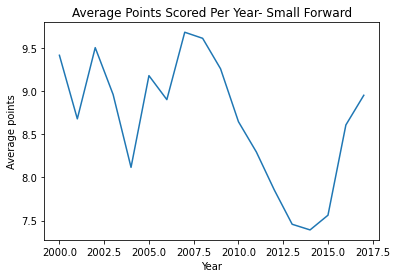

In [116]:
average_SF = stats1_SF.groupby("Year")["PtsAverage"].mean()
c = average_SF.plot()
c.set_title("Average Points Scored Per Year- Small Forward")
c.set_xlabel("Year")
c.set_ylabel("Average points")

In [117]:
# Power forwards only 

stats1_PF = stats1[stats1["Pos"] == "PF"]
stats1_PF.head(10)

,Year,Player,Pos,Tm,PtsAverage
14489,2000.0,Anthony Avent,PF,LAC,1.7
14493,2000.0,Charles Barkley*,PF,HOU,14.4
14504,2000.0,Mario Bennett,PF,LAC,0.0
14509,2000.0,Corie Blount,PF,PHO,2.8
14511,2000.0,Etdrick Bohannon,PF,TOT,2.2
14527,2000.0,Elton Brand,PF,CHI,20.1
14529,2000.0,Chucky Brown,PF,TOT,5.3
14534,2000.0,P.J. Brown,PF,MIA,9.6
14538,2000.0,Mark Bryant,PF,CLE,5.7
14542,2000.0,Matt Bullard,PF,HOU,6.8


In [118]:
describe_PF = stats1_PF.groupby("Year")["PtsAverage"].describe()
describe_PF

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,97.0,7.455670,6.112640,0.0,2.700,5.70,10.300,25.5
2001.0,89.0,7.901124,6.478627,0.0,3.100,6.00,10.500,27.1
2002.0,86.0,7.920930,5.982546,0.0,3.625,6.45,10.650,25.5
2003.0,82.0,7.952439,6.632993,0.0,2.800,5.90,10.700,25.1
2004.0,98.0,8.022449,6.001452,0.0,3.200,6.10,11.800,24.2
2005.0,86.0,8.798837,6.362454,0.4,3.625,7.00,12.300,26.1
2006.0,88.0,8.571591,6.320809,0.0,3.400,7.55,12.925,26.6
2007.0,108.0,6.953704,5.344828,0.6,2.900,5.40,9.625,24.6
2008.0,94.0,7.444681,5.665831,0.4,3.175,5.75,10.675,23.6


Text(0, 0.5, 'Average points')

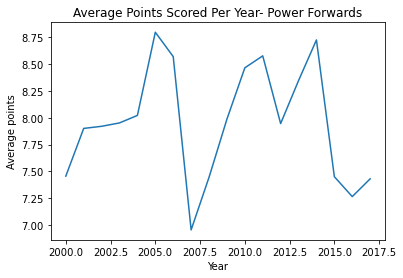

In [119]:
average_PF = stats1_PF.groupby("Year")["PtsAverage"].mean()
d = average_PF.plot()
d.set_title("Average Points Scored Per Year- Power Forwards")
d.set_xlabel("Year")
d.set_ylabel("Average points")

In [120]:
# Centers only

stats1_C = stats1[stats1["Pos"] == "C"]
stats1_C.head(15)

,Year,Player,Pos,Tm,PtsAverage
14477,2000.0,John Amaechi,C,ORL,10.4
14482,2000.0,Chris Anstey,C,CHI,6.0
14488,2000.0,Isaac Austin,C,WAS,6.7
14492,2000.0,Vin Baker,C,SEA,16.6
14500,2000.0,Tony Battie,C,BOS,6.6
14502,2000.0,Benoit Benjamin,C,CLE,0.7
14514,2000.0,Calvin Booth,C,WAS,3.8
14525,2000.0,Shawn Bradley,C,DAL,8.4
14526,2000.0,A.J. Bramlett,C,CLE,1.0
14545,2000.0,Michael Cage,C,NJN,1.4


In [121]:
describe_C = stats1_C.groupby("Year")["PtsAverage"].describe()
describe_C

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,87.0,6.413793,5.204541,0.7,2.250,5.40,9.050,29.7
2001.0,92.0,5.917391,4.546406,0.3,2.725,4.60,8.325,28.7
2002.0,99.0,6.021212,4.733322,0.8,2.650,4.80,7.850,27.2
2003.0,101.0,5.753465,4.062944,0.0,3.300,4.90,7.200,27.5
2004.0,93.0,5.575269,4.199551,0.0,2.900,4.50,7.800,21.8
2005.0,101.0,5.687129,4.687017,0.2,2.300,4.50,7.700,26.0
2006.0,99.0,5.493939,4.454688,0.0,2.350,4.70,6.900,22.5
2007.0,94.0,6.845745,5.987364,0.0,2.300,4.90,9.750,25.0
2008.0,99.0,6.751515,5.859657,0.0,2.100,4.80,9.600,25.2


Text(0, 0.5, 'Average points')

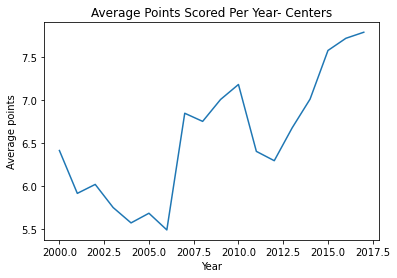

In [122]:
average_C = stats1_C.groupby("Year")["PtsAverage"].mean()
e = average_C.plot()
e.set_title("Average Points Scored Per Year- Centers")
e.set_xlabel("Year")
e.set_ylabel("Average points")

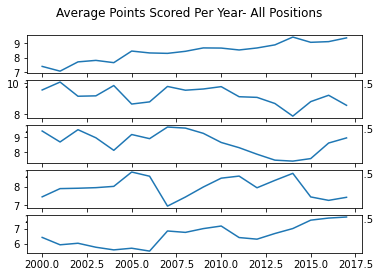

In [123]:
fig, axs = plt.subplots(5)
fig.suptitle("Average Points Scored Per Year- All Positions")
axs[0].plot(average_PG)
axs[1].plot(average_SG)
axs[2].plot(average_SF)
axs[3].plot(average_PF)
axs[4].plot(average_C)

In [13]:
stats2 = pd.read_csv("2018-2021/NBA_stats.csv")

In [14]:
stats2.rename(columns={"Points": "PtsAverage", "Team": "Tm"}, inplace=True)
stats2.head(10)

,Player,Pos,Age,Tm,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,PtsAverage,Rank,Year
0,Álex Abrines,SG,24,OKC,75,15.1,1.5,3.9,1.1,2.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1,2018
1,Quincy Acy,PF,27,BRK,70,19.4,1.9,5.2,1.5,4.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2,2018
2,Steven Adams,C,24,OKC,76,32.7,5.9,9.4,0.0,0.0,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,3,2018
3,Bam Adebayo,C,20,MIA,69,19.8,2.5,4.9,0.0,0.1,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,4,2018
4,Arron Afflalo,SG,32,ORL,53,12.9,1.2,3.1,0.5,1.3,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,5,2018
5,Cole Aldrich,C,29,MIN,21,2.3,0.2,0.7,0.0,0.0,...,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6,6,2018
6,LaMarcus Aldridge,C,32,SAS,75,33.5,9.2,18.0,0.4,1.2,...,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,7,2018
7,Jarrett Allen,C,19,BRK,72,20.0,3.3,5.5,0.1,0.2,...,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,8,2018
8,Kadeem Allen,PG,25,BOS,18,5.9,0.3,1.2,0.0,0.6,...,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1,9,2018
9,Tony Allen,SF,36,NOP,22,12.4,2.0,4.1,0.2,0.5,...,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7,10,2018


In [15]:
average_points2 = stats2.groupby("Year")["PtsAverage"].describe()
average_points2

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2018,664.0,7.894880,5.799436,0.0,3.575,6.55,11.40,30.4
2019,708.0,8.384322,5.828200,0.0,4.000,7.00,11.50,36.1
2020,651.0,8.461290,6.197278,0.0,3.800,6.80,11.65,34.3
2021,705.0,8.616596,6.272808,0.0,4.000,7.20,11.70,32.0


In [16]:
# Reusing the totalOnly function earlier to filter out stats

totalOnly(stats2)

In [17]:
'''
Resuls of the table. Note how Lou Williams, DJ Wilson, and Delon Wright's stats show only the TOT stats and not
the individual team stats. 
'''

stats2 = stats2.filter(["Year", "Player", "Pos", "Tm", "PtsAverage"])
stats2.tail(30)

,Year,Player,Pos,Tm,PtsAverage
2692,2021,T.J. Warren,SF,IND,15.5
2693,2021,P.J. Washington,PF,CHO,12.9
2694,2021,Yuta Watanabe,SF,TOR,4.4
2695,2021,Tremont Waters,PG,BOS,3.8
2696,2021,Paul Watson,SF,TOR,4.1
2697,2021,Quinndary Weatherspoon,SG,SAS,2.3
2698,2021,Russell Westbrook,PG,WAS,22.2
2699,2021,Coby White,PG,CHI,15.1
2700,2021,Derrick White,SG,SAS,15.4
2701,2021,Hassan Whiteside,C,SAC,8.1


In [18]:
# Combining the 2000-2017 dataframe and the 2018-2021 dataframe

all_stats = pd.merge(stats1, stats2, how = "outer")
all_stats

,Year,Player,Pos,Tm,PtsAverage
0,2000.0,Tariq Abdul-Wahad,SG,TOT,11.4
1,2000.0,Shareef Abdur-Rahim,SF,VAN,20.3
2,2000.0,Cory Alexander,PG,DEN,2.8
3,2000.0,Ray Allen,SG,MIL,22.1
4,2000.0,Rafer Alston,PG,MIL,2.2
...,...,...,...,...,...
10457,2021.0,Delon Wright,SG-PG,TOT,10.2
10458,2021.0,Thaddeus Young,PF,CHI,12.1
10459,2021.0,Trae Young,PG,ATL,25.3
10460,2021.0,Cody Zeller,C,CHO,9.4


In [19]:
all_stats.groupby("Year")["PtsAverage"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,440.0,7.960909,5.797487,0.0,3.475,6.60,11.425,29.7
2001.0,443.0,7.791422,6.013783,0.0,3.350,6.10,10.550,31.1
2002.0,440.0,7.981364,5.902300,0.0,3.400,6.50,11.200,31.4
2003.0,429.0,7.829371,6.068928,0.0,3.400,6.10,10.500,32.1
2004.0,449.0,7.733408,5.801481,0.0,3.400,6.00,10.900,28.0
2005.0,467.0,8.057816,6.051134,0.0,3.500,6.40,11.350,30.7
2006.0,461.0,7.946204,6.296083,0.0,3.000,6.20,11.500,35.4
2007.0,458.0,8.207642,6.288172,0.0,3.100,6.40,11.600,31.6
2008.0,459.0,8.184314,6.105028,0.0,3.500,6.70,11.600,30.0


Text(0, 0.5, 'Average points')

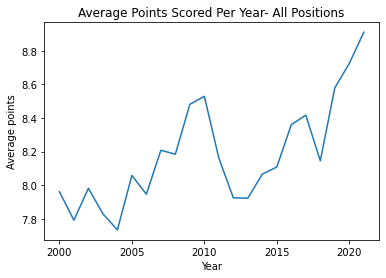

In [21]:
average_points = all_stats.groupby("Year")["PtsAverage"].mean()
av = average_points.plot()
av.set_title("Average Points Scored Per Year- All Positions")
av.set_xlabel("Year")
av.set_ylabel("Average points")

In [92]:
# Point guards only

allstats_PG = all_stats[all_stats["Pos"] == "PG"]
allstats_PG.head()

,Year,Player,Pos,Tm,PtsAverage
2,2000.0,Cory Alexander,PG,DEN,2.8
4,2000.0,Rafer Alston,PG,MIL,2.2
7,2000.0,Kenny Anderson,PG,BOS,14.0
11,2000.0,Greg Anthony,PG,POR,6.3
12,2000.0,B.J. Armstrong,PG,CHI,7.4


In [93]:
allstats_PG = all_stats.filter(["Year", "PtsAverage"])
allstats_PG.head()

,Year,PtsAverage
0,2000.0,11.4
1,2000.0,20.3
2,2000.0,2.8
3,2000.0,22.1
4,2000.0,2.2


In [94]:
describe_PG2 = allstats_PG.groupby("Year").describe()
describe_PG2

PtsAverage                                                    
            count      mean       std  min    25%   50%     75%   max
Year                                                                 
2000.0      440.0  7.960909  5.797487  0.0  3.475  6.60  11.425  29.7
2001.0      443.0  7.791422  6.013783  0.0  3.350  6.10  10.550  31.1
2002.0      440.0  7.981364  5.902300  0.0  3.400  6.50  11.200  31.4
2003.0      429.0  7.829371  6.068928  0.0  3.400  6.10  10.500  32.1
2004.0      449.0  7.733408  5.801481  0.0  3.400  6.00  10.900  28.0
2005.0      467.0  8.057816  6.051134  0.0  3.500  6.40  11.350  30.7
2006.0      461.0  7.946204  6.296083  0.0  3.000  6.20  11.500  35.4
2007.0      458.0  8.207642  6.288172  0.0  3.100  6.40  11.600  31.6
2008.0      459.0  8.184314  6.105028  0.0  3.500  6.70  11.600  30.0
2009.0      448.0  8.481473  6.161629  0.0  3.500  6.85  12.050  30.2
2010.0      446.0  8.529148  5.888645  0.0  3.900  7.45  11.900  30.1
2011.0      459.0  8.160784  5.756146  0.0  3.750  7.10  11.600  27.7
2012.0      479.0  7.924635  5.471705  0.0  3.550  6.60  11.300  28.0
2013.0      473.0  7.922622  5.493673  0.0  3.700  6.70  11.300  28.7
2014.0      485.0  8.065567  5.847705  0.0  3.500  6.60  11.400  32.0
2015.0      499.0  8.108417  5.482822  0.0  4.000  7.00  11.550  28.1
2016.0      478.0  8.360251  5.652588  0.0  4.000  7.00  11.675  30.1
2017.0      489.0  8.416564  6.045184  0.0  4.100  6.80  10.900  31.6
2018.0      546.0  8.145055  5.924595  0.0  3.725  6.70  11.700  30.4
2019.0      536.0  8.579291  6.106837  0.0  4.000  7.00  11.625  36.1
2020.0      531.0  8.724859  6.359636  0.0  3.900  7.00  11.900  34.3
2021.0      547.0  8.910603  6.470140  0.0  4.100  7.30  12.250  32.0

Text(0, 0.5, 'Average points')

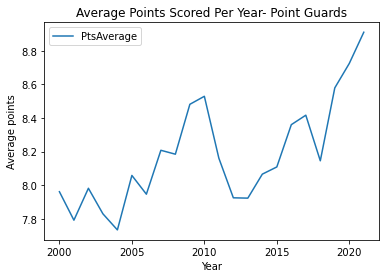

In [95]:
average_PG = allstats_PG.groupby("Year").mean()
pg = average_PG.plot()
pg.set_title("Average Points Scored Per Year- Point Guards")
pg.set_xlabel("Year")
pg.set_ylabel("Average points")

<AxesSubplot:xlabel='Year', ylabel='PtsAverage'>

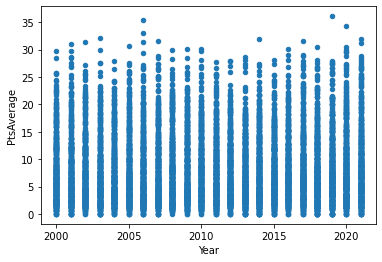

In [96]:
# Scatter plot of the point guard data

allstats_PG.plot.scatter(x = "Year", y = "PtsAverage")

In [97]:
#Creating a new dataframe for point guards using the PtsAverage for each year 

years = np.linspace(2000, 2021, 22)
#print(years)
new_PG = pd.DataFrame({"Year": years, "PtsAverage": average_PG["PtsAverage"]})
new_PG.rename(columns={ new_PG.columns[0]: "Yr" }, inplace = True)
new_PG

,Yr,PtsAverage
Year,,
2000.0,2000.0,7.960909
2001.0,2001.0,7.791422
2002.0,2002.0,7.981364
2003.0,2003.0,7.829371
2004.0,2004.0,7.733408
2005.0,2005.0,8.057816
2006.0,2006.0,7.946204
2007.0,2007.0,8.207642
2008.0,2008.0,8.184314


In [98]:
# Linear regression using statsmodels 

X = new_PG["Yr"]
Y = new_PG["PtsAverage"]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
# model = smf.ols(data = average_PG, formula="y ~ x")
# result = model.fit()

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     21.82
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           0.000147
Time:                        15:10:13   Log-Likelihood:                 2.8765
No. Observations:                  22   AIC:                            -1.753
Df Residuals:                      20   BIC:                            0.4290
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.0936     15.045     -4.127      0.001     -93.477     -30.711
Yr             0.0350      0.007      4.671      0.000       0.019       0.051
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.786
Skew:                           0.091   Prob(JB):                        0.675
Kurtosis:                       2.092   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
new_PG2 = new_PG[new_PG["Yr"] >= 2010]
new_PG2

,Yr,PtsAverage
Year,,
2010.0,2010.0,8.529148
2011.0,2011.0,8.160784
2012.0,2012.0,7.924635
2013.0,2013.0,7.922622
2014.0,2014.0,8.065567
2015.0,2015.0,8.108417
2016.0,2016.0,8.360251
2017.0,2017.0,8.416564
2018.0,2018.0,8.145055


In [232]:
X = new_PG2["Yr"]
Y = new_PG2["PtsAverage"]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()

In [233]:
result1.summary()

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     7.106
Date:                Thu, 20 Jan 2022   Prob (F-statistic):             0.0237
Time:                        18:17:51   Log-Likelihood:                0.45391
No. Observations:                  12   AIC:                             3.092
Df Residuals:                      10   BIC:                             4.062
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -106.3533     43.017     -2.472      0.033    -202.201     -10.505
Yr             0.0569      0.021      2.666      0.024       0.009       0.104
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                0.889
Skew:                           0.658   Prob(JB):                        0.641
Kurtosis:                       2.781   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
nextyears = np.linspace(2022, 2031, 10)
#print(nextyears)
n = sm.add_constant(nextyears)
nextpoints = result.predict(n)

In [192]:
predicted = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints})
predicted

,Yr,PtsAverage
0,2022.0,8.584784
1,2023.0,8.619739
2,2024.0,8.654694
3,2025.0,8.689649
4,2026.0,8.724603
5,2027.0,8.759558
6,2028.0,8.794513
7,2029.0,8.829467
8,2030.0,8.864422
9,2031.0,8.899377


In [101]:
# Merging the new_PG dataframe with the predicted dataframe

total_PG = pd.merge(new_PG, predicted, how = "outer")
total_PG

,Yr,PtsAverage
0,2000.0,7.960909
1,2001.0,7.791422
2,2002.0,7.981364
3,2003.0,7.829371
4,2004.0,7.733408
5,2005.0,8.057816
6,2006.0,7.946204
7,2007.0,8.207642
8,2008.0,8.184314
9,2009.0,8.481473


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Point Guards)')]

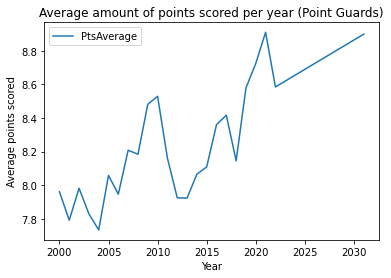

In [102]:
final_PG = total_PG.plot(x = "Yr", y = "PtsAverage")
final_PG.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Point Guards)")

In [234]:
nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints1 = result1.predict(n)

In [235]:
predicted1 = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints1})
predicted1

,Yr,PtsAverage
0,2022.0,8.690474
1,2023.0,8.747370
2,2024.0,8.804266
3,2025.0,8.861162
4,2026.0,8.918058
5,2027.0,8.974954
6,2028.0,9.031850
7,2029.0,9.088746
8,2030.0,9.145642
9,2031.0,9.202538


In [240]:
# Merging the predicted output with the previous dataframe

total_PG2 = pd.merge(new_PG, predicted1, how = "outer")
total_PG2

,Yr,PtsAverage
0,2000.0,7.960909
1,2001.0,7.791422
2,2002.0,7.981364
3,2003.0,7.829371
4,2004.0,7.733408
5,2005.0,8.057816
6,2006.0,7.946204
7,2007.0,8.207642
8,2008.0,8.184314
9,2009.0,8.481473


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Point Guards) - Alternate version')]

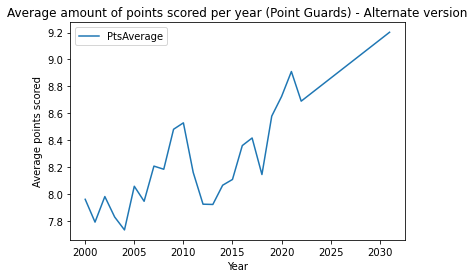

In [237]:
final_PG2 = total_PG2.plot(x = "Yr", y = "PtsAverage")
final_PG2.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Point Guards) - Alternate version")

Slope: 0.035586280818621495; intercept: -63.36417608680407


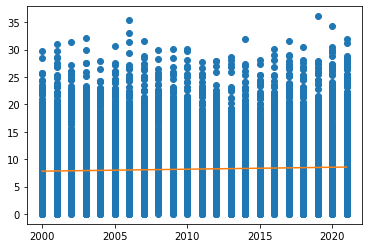

In [34]:
# Plotting a regression line/best fit line for the point guard data 

x = np.array(allstats_PG["Year"])
y = np.array(allstats_PG["PtsAverage"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
plt.plot(x, y, "o") # Scatter plot
plt.plot(x, m * x + b) # Best fit line

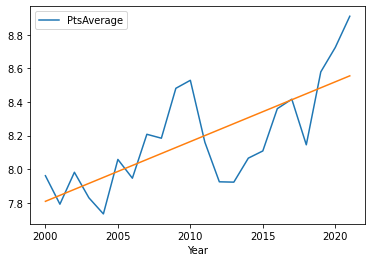

In [35]:
# Mean data and best fit line

average_PG.plot()
plt.plot(x, m * x + b)

In [42]:
# Shooting guards only

allstats_SG = all_stats[all_stats["Pos"] == "SG"]
allstats_SG.head()

,Year,Player,Pos,Tm,PtsAverage
0,2000.0,Tariq Abdul-Wahad,SG,TOT,11.4
3,2000.0,Ray Allen,SG,MIL,22.1
6,2000.0,Derek Anderson,SG,LAC,16.9
8,2000.0,Nick Anderson,SG,SAC,10.8
15,2000.0,Stacey Augmon,SG,POR,3.4


In [43]:
describe_SG2 = allstats_SG.groupby("Year")["PtsAverage"].describe()
describe_SG2

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,73.0,9.568493,6.309338,0.3,4.700,7.90,13.600,28.4
2001.0,69.0,10.076812,7.114756,1.0,4.800,9.10,12.300,31.1
2002.0,86.0,9.166279,6.846564,0.3,4.025,7.45,12.150,31.4
2003.0,80.0,9.191250,7.387968,1.2,3.250,7.40,12.700,32.1
2004.0,77.0,9.853247,6.927834,0.2,4.500,7.90,14.000,28.0
2005.0,92.0,8.665217,6.066942,0.0,4.450,6.80,11.800,27.6
2006.0,85.0,8.804706,6.910239,0.0,3.600,7.50,11.200,35.4
2007.0,92.0,9.794565,7.074725,0.0,4.175,7.85,13.575,31.6
2008.0,90.0,9.553333,6.879757,0.8,4.100,8.10,12.500,28.3


Text(0, 0.5, 'Average points')

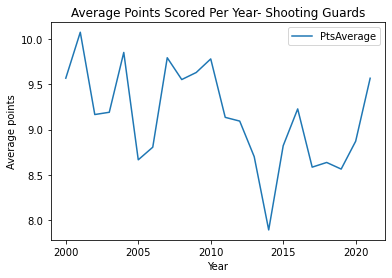

In [44]:
average_SG = allstats_SG.groupby("Year").mean()
sg = average_SG.plot()
sg.set_title("Average Points Scored Per Year- Shooting Guards")
sg.set_xlabel("Year")
sg.set_ylabel("Average points")

In [45]:
years = np.linspace(2000, 2021, 22)
new_SG = pd.DataFrame({"Yr": years, "PtsAverage": average_SG["PtsAverage"]})
new_SG

,Yr,PtsAverage
Year,,
2000.0,2000.0,9.568493
2001.0,2001.0,10.076812
2002.0,2002.0,9.166279
2003.0,2003.0,9.191250
2004.0,2004.0,9.853247
2005.0,2005.0,8.665217
2006.0,2006.0,8.804706
2007.0,2007.0,9.794565
2008.0,2008.0,9.553333


In [241]:
# Linear regression using statsmodels for shooting guards

X = new_SG["Yr"]
Y = new_SG["PtsAverage"]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X)
result2 = model2.fit()

In [242]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     6.098
Date:                Thu, 20 Jan 2022   Prob (F-statistic):             0.0227
Time:                        18:45:08   Log-Likelihood:                -14.330
No. Observations:                  22   AIC:                             32.66
Df Residuals:                      20   BIC:                             34.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3632     32.889      2.748      0.012      21.758     158.968
Yr            -0.0404      0.016     -2.470      0.023      -0.075      -0.006
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.371
Skew:                          -0.292   Prob(JB):                        0.830
Kurtosis:                       2.747   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
new_SG2 = new_SG[new_SG["Yr"] >= 2010]
new_SG2

,Yr,PtsAverage
Year,,
2010.0,2010.0,9.781707
2011.0,2011.0,9.135106
2012.0,2012.0,9.093617
2013.0,2013.0,8.700000
2014.0,2014.0,7.889524
2015.0,2015.0,8.821101
2016.0,2016.0,9.228421
2017.0,2017.0,8.584112
2018.0,2018.0,8.635878


In [243]:
# Linear regression using statsmodels for shooting guards

X = new_SG2["Yr"]
Y = new_SG2["PtsAverage"]
X = sm.add_constant(X)
model2_alt = sm.OLS(Y, X)
result2_alt = model2_alt.fit()

In [244]:
result2_alt.summary()

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.2548
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.625
Time:                        18:45:59   Log-Likelihood:                -8.0907
No. Observations:                  12   AIC:                             20.18
Df Residuals:                      10   BIC:                             21.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1646     87.676      0.606      0.558    -142.190     248.519
Yr            -0.0220      0.044     -0.505      0.625      -0.119       0.075
==============================================================================
Omnibus:                        1.108   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.110
Skew:                          -0.215   Prob(JB):                        0.947
Kurtosis:                       3.186   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints2 = result2.predict(n)

In [246]:
predicted2 = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints2})
predicted2

,Yr,PtsAverage
0,2022.0,8.679787
1,2023.0,8.639390
2,2024.0,8.598992
3,2025.0,8.558595
4,2026.0,8.518198
5,2027.0,8.477800
6,2028.0,8.437403
7,2029.0,8.397006
8,2030.0,8.356608
9,2031.0,8.316211


In [247]:
# Merging the predicted output with the previous dataframe

total_SG = pd.merge(new_SG, predicted2, how = "outer")
total_SG

,Yr,PtsAverage
0,2000.0,9.568493
1,2001.0,10.076812
2,2002.0,9.166279
3,2003.0,9.191250
4,2004.0,9.853247
5,2005.0,8.665217
6,2006.0,8.804706
7,2007.0,9.794565
8,2008.0,9.553333
9,2009.0,9.631461


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Shooting Guards)')]

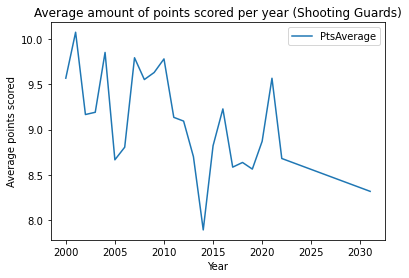

In [248]:
final_SG = total_SG.plot(x = "Yr", y = "PtsAverage")
final_SG.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Shooting Guards)")

In [249]:
# Alternate data 

nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints2_alt = result2_alt.predict(n)

In [250]:
predicted2_alt = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints2_alt})
predicted2_alt

,Yr,PtsAverage
0,2022.0,8.763139
1,2023.0,8.741180
2,2024.0,8.719221
3,2025.0,8.697262
4,2026.0,8.675302
5,2027.0,8.653343
6,2028.0,8.631384
7,2029.0,8.609425
8,2030.0,8.587466
9,2031.0,8.565507


In [251]:
total_SG2 = pd.merge(new_SG, predicted2_alt, how = "outer")
total_SG2

,Yr,PtsAverage
0,2000.0,9.568493
1,2001.0,10.076812
2,2002.0,9.166279
3,2003.0,9.191250
4,2004.0,9.853247
5,2005.0,8.665217
6,2006.0,8.804706
7,2007.0,9.794565
8,2008.0,9.553333
9,2009.0,9.631461


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Shooting Guards) - alternate version')]

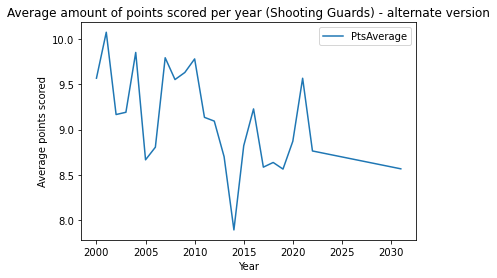

In [252]:
final_SG2 = total_SG2.plot(x = "Yr", y = "PtsAverage")
final_SG2.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Shooting Guards) - alternate version")

Slope: -0.037769510401794534; intercept: 85.06464366172091


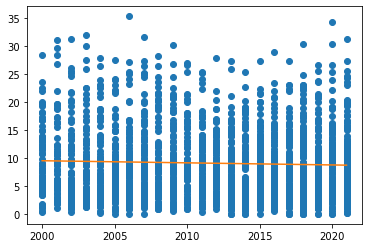

In [88]:
# Plotting a regression line/best fit line for the shooting guard data 

x = np.array(allstats_SG["Year"])
y = np.array(allstats_SG["PtsAverage"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
plt.plot(x, y, "o") # Scatter plot
plt.plot(x, m * x + b) # Best fit line

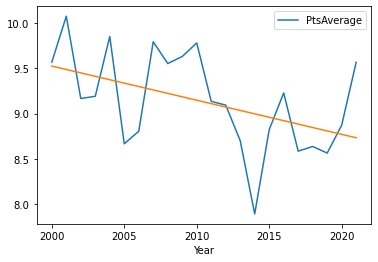

In [89]:
# Mean data and best fit line

average_SG.plot()
plt.plot(x, m * x + b)

In [67]:
# Small forwards only 

allstats_SF = all_stats[all_stats["Pos"] == "SF"]
allstats_SF.head()

,Year,Player,Pos,Tm,PtsAverage
1,2000.0,Shareef Abdur-Rahim,SF,VAN,20.3
9,2000.0,Shandon Anderson,SF,HOU,12.3
27,2000.0,Jonathan Bender,SF,IND,2.7
39,2000.0,Lazaro Borrell,SF,SEA,3.6
40,2000.0,Cal Bowdler,SF,ATL,2.7


In [68]:
describe_SF2 = allstats_SF.groupby("Year")["PtsAverage"].describe()
describe_SF2

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,86.0,9.416279,6.111914,0.0,4.600,8.20,12.950,25.8
2001.0,88.0,8.679545,6.431749,0.0,3.750,7.00,12.000,27.6
2002.0,80.0,9.505000,6.066528,0.6,4.125,8.70,13.300,22.9
2003.0,77.0,8.961039,6.147981,0.0,4.000,7.50,14.100,22.2
2004.0,82.0,8.117073,5.779718,0.8,3.625,6.80,10.750,24.2
2005.0,87.0,9.180460,6.650806,0.0,3.600,7.30,13.400,27.2
2006.0,81.0,8.902469,6.962093,0.0,3.200,6.70,14.000,31.4
2007.0,73.0,9.683562,6.797304,0.0,4.100,8.40,14.300,28.9
2008.0,76.0,9.613158,6.910077,0.7,3.900,7.75,13.200,30.0


Text(0, 0.5, 'Average points')

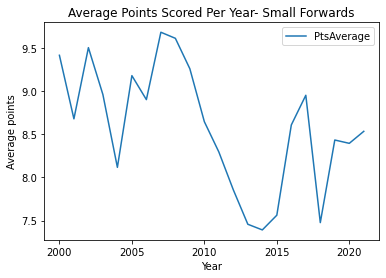

In [75]:
average_SF = allstats_SF.groupby("Year").mean()
sf = average_SF.plot()
sf.set_title("Average Points Scored Per Year- Small Forwards")
sf.set_xlabel("Year")
sf.set_ylabel("Average points")

In [72]:
# Plotting a regression line/best fit line for the small forward data 

x = np.array(allstats_SF["Year"])
y = np.array(allstats_SF["PtsAverage"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))

Slope: -0.05746643405246711; intercept: 124.10083460602917


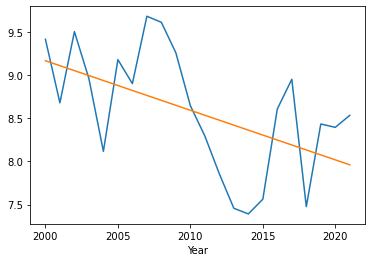

In [73]:
average_SF.plot()
plt.plot(x, m * x + b)

In [76]:
years = np.linspace(2000, 2021, 22)
new_SF = pd.DataFrame({"Yr": years, "PtsAverage": average_SF["PtsAverage"]})
new_SF

,Yr,PtsAverage
Year,,
2000.0,2000.0,9.416279
2001.0,2001.0,8.679545
2002.0,2002.0,9.505000
2003.0,2003.0,8.961039
2004.0,2004.0,8.117073
2005.0,2005.0,9.180460
2006.0,2006.0,8.902469
2007.0,2007.0,9.683562
2008.0,2008.0,9.613158


In [253]:
# Linear regression using statsmodels for small forwards

X = new_SF["Yr"]
Y = new_SF["PtsAverage"]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X)
result3 = model3.fit()

In [254]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.661
Date:                Thu, 20 Jan 2022   Prob (F-statistic):             0.0119
Time:                        18:52:09   Log-Likelihood:                -19.892
No. Observations:                  22   AIC:                             43.78
Df Residuals:                      20   BIC:                             45.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.8086     42.350      2.971      0.008      37.467     214.150
Yr            -0.0583      0.021     -2.768      0.012      -0.102      -0.014
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.603
Skew:                          -0.270   Prob(JB):                        0.449
Kurtosis:                       1.793   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
# Using a portion of the small forward data since the best fit line is trending downwards 

new_SF2 = new_SF[new_SF["Yr"] >= 2010]
new_SF2

,Yr,PtsAverage
Year,,
2010.0,2010.0,8.646512
2011.0,2011.0,8.295349
2012.0,2012.0,7.855914
2013.0,2013.0,7.457292
2014.0,2014.0,7.391753
2015.0,2015.0,7.562222
2016.0,2016.0,8.608602
2017.0,2017.0,8.952747
2018.0,2018.0,7.476404


In [260]:
# Linear regression using statsmodels for small forwards - Pt. 2

X = new_SF2["Yr"]
Y = new_SF2["PtsAverage"]
X = sm.add_constant(X)
model3_alt = sm.OLS(Y, X)
result3_alt = model3_alt.fit()

In [261]:
result3_alt.summary()

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.4993
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.496
Time:                        18:53:27   Log-Likelihood:                -9.0773
No. Observations:                  12   AIC:                             22.15
Df Residuals:                      10   BIC:                             23.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.1295     95.189     -0.621      0.548    -271.224     152.965
Yr             0.0334      0.047      0.707      0.496      -0.072       0.139
==============================================================================
Omnibus:                        2.307   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                0.950
Skew:                          -0.115   Prob(JB):                        0.622
Kurtosis:                       1.641   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints3 = result3.predict(n)

In [256]:
predicted3 = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints3})
predicted3

,Yr,PtsAverage
0,2022.0,7.917217
1,2023.0,7.858913
2,2024.0,7.800609
3,2025.0,7.742304
4,2026.0,7.684000
5,2027.0,7.625696
6,2028.0,7.567391
7,2029.0,7.509087
8,2030.0,7.450783
9,2031.0,7.392478


In [257]:
# Merging the predicted output with the previous dataframe

total_SF = pd.merge(new_SF, predicted3, how = "outer")
total_SF

,Yr,PtsAverage
0,2000.0,9.416279
1,2001.0,8.679545
2,2002.0,9.505000
3,2003.0,8.961039
4,2004.0,8.117073
5,2005.0,9.180460
6,2006.0,8.902469
7,2007.0,9.683562
8,2008.0,9.613158
9,2009.0,9.260000


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Small Forwards)')]

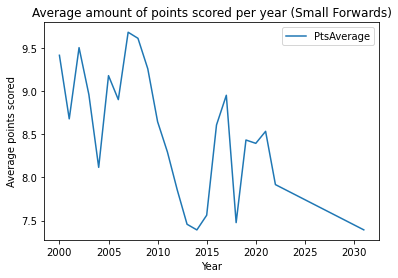

In [258]:
final_SF = total_SF.plot(x = "Yr", y = "PtsAverage")
final_SF.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Small Forwards)")

In [262]:
# Alternate data

nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints3_alt = result3_alt.predict(n)

In [263]:
predicted3_alt = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints3_alt})
predicted3_alt

,Yr,PtsAverage
0,2022.0,8.351193
1,2023.0,8.384566
2,2024.0,8.417939
3,2025.0,8.451312
4,2026.0,8.484686
5,2027.0,8.518059
6,2028.0,8.551432
7,2029.0,8.584805
8,2030.0,8.618179
9,2031.0,8.651552


In [264]:
total_SF2 = pd.merge(new_SF, predicted3_alt, how = "outer")
total_SF2

,Yr,PtsAverage
0,2000.0,9.416279
1,2001.0,8.679545
2,2002.0,9.505000
3,2003.0,8.961039
4,2004.0,8.117073
5,2005.0,9.180460
6,2006.0,8.902469
7,2007.0,9.683562
8,2008.0,9.613158
9,2009.0,9.260000


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Small Forwards) - Alternate Version')]

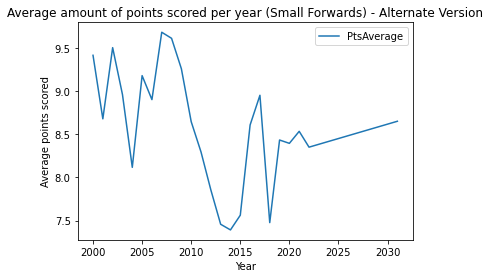

In [267]:
final_SF2 = total_SF2.plot(x = "Yr", y = "PtsAverage")
final_SF2.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Small Forwards) - Alternate Version")

In [265]:
# Power forwards only

allstats_PF = all_stats[all_stats["Pos"] == "PF"]
allstats_PF.head()

,Year,Player,Pos,Tm,PtsAverage
17,2000.0,Anthony Avent,PF,LAC,1.7
21,2000.0,Charles Barkley*,PF,HOU,14.4
30,2000.0,Mario Bennett,PF,LAC,0.0
35,2000.0,Corie Blount,PF,PHO,2.8
37,2000.0,Etdrick Bohannon,PF,TOT,2.2


In [266]:
describe_PF = allstats_PF.groupby("Year")["PtsAverage"].describe()
describe_PF

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,97.0,7.455670,6.112640,0.0,2.700,5.70,10.300,25.5
2001.0,89.0,7.901124,6.478627,0.0,3.100,6.00,10.500,27.1
2002.0,86.0,7.920930,5.982546,0.0,3.625,6.45,10.650,25.5
2003.0,82.0,7.952439,6.632993,0.0,2.800,5.90,10.700,25.1
2004.0,98.0,8.022449,6.001452,0.0,3.200,6.10,11.800,24.2
2005.0,86.0,8.798837,6.362454,0.4,3.625,7.00,12.300,26.1
2006.0,88.0,8.571591,6.320809,0.0,3.400,7.55,12.925,26.6
2007.0,108.0,6.953704,5.344828,0.6,2.900,5.40,9.625,24.6
2008.0,94.0,7.444681,5.665831,0.4,3.175,5.75,10.675,23.6


Text(0, 0.5, 'Average points')

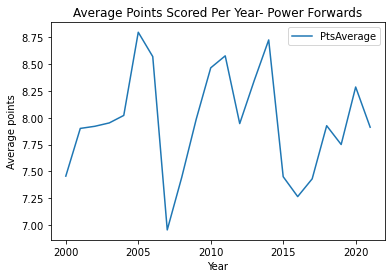

In [130]:
average_PF = allstats_PF.groupby("Year").mean()
pf = average_PF.plot()
pf.set_title("Average Points Scored Per Year- Power Forwards")
pf.set_xlabel("Year")
pf.set_ylabel("Average points")

In [131]:
# Plotting a regression line/best fit line for the power forward data 

x = np.array(allstats_PF["Year"])
y = np.array(allstats_PF["PtsAverage"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))

Slope: -0.0014494395261409317; intercept: 10.849210658019967


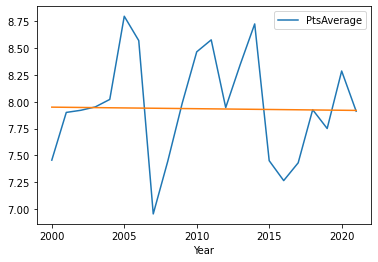

In [132]:
average_PF.plot()
plt.plot(x, m * x + b)

In [193]:
years = np.linspace(2000, 2021, 22)
new_PF = pd.DataFrame({"Yr": years, "PtsAverage": average_PF["PtsAverage"]})
new_PF

,Yr,PtsAverage
Year,,
2000.0,2000.0,7.455670
2001.0,2001.0,7.901124
2002.0,2002.0,7.920930
2003.0,2003.0,7.952439
2004.0,2004.0,8.022449
2005.0,2005.0,8.798837
2006.0,2006.0,8.571591
2007.0,2007.0,6.953704
2008.0,2008.0,7.444681


In [268]:
# Linear regression using statsmodels for power forwards

X = new_PF["Yr"]
Y = new_PF["PtsAverage"]
X = sm.add_constant(X)
model4 = sm.OLS(Y, X)
result4 = model4.fit()

In [269]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.01825
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.894
Time:                        18:56:49   Log-Likelihood:                -15.289
No. Observations:                  22   AIC:                             34.58
Df Residuals:                      20   BIC:                             36.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5996     34.354      0.367      0.718     -59.062      84.262
Yr            -0.0023      0.017     -0.135      0.894      -0.038       0.033
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.497
Skew:                          -0.074   Prob(JB):                        0.780
Kurtosis:                       2.279   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
new_PF2 = new_PF[new_PF["Yr"] >= 2010]
new_PF2

,Yr,PtsAverage
Year,,
2010.0,2010.0,8.466667
2011.0,2011.0,8.578481
2012.0,2012.0,7.946316
2013.0,2013.0,8.347423
2014.0,2014.0,8.727083
2015.0,2015.0,7.450459
2016.0,2016.0,7.264706
2017.0,2017.0,7.430612
2018.0,2018.0,7.926415


In [271]:
# Linear regression using statsmodels for power forwards - part 2

X = new_PF2["Yr"]
Y = new_PF2["PtsAverage"]
X = sm.add_constant(X)
model4_alt = sm.OLS(Y, X)
result4_alt = model4_alt.fit()

In [272]:
result4_alt.summary()

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.237
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.166
Time:                        18:57:17   Log-Likelihood:                -6.4728
No. Observations:                  12   AIC:                             16.95
Df Residuals:                      10   BIC:                             17.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.6051     76.617      1.600      0.141     -48.109     293.319
Yr            -0.0569      0.038     -1.496      0.166      -0.142       0.028
==============================================================================
Omnibus:                        0.831   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.691
Skew:                          -0.279   Prob(JB):                        0.708
Kurtosis:                       1.966   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [273]:
nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints4 = result4.predict(n)

In [274]:
predicted4 = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints4})
predicted4

,Yr,PtsAverage
0,2022.0,7.932476
1,2023.0,7.930168
2,2024.0,7.927860
3,2025.0,7.925552
4,2026.0,7.923244
5,2027.0,7.920935
6,2028.0,7.918627
7,2029.0,7.916319
8,2030.0,7.914011
9,2031.0,7.911703


In [275]:
#Merging the predicted output with the previous dataframe

total_PF = pd.merge(new_PF, predicted4, how = "outer")
total_PF

,Yr,PtsAverage
0,2000.0,7.455670
1,2001.0,7.901124
2,2002.0,7.920930
3,2003.0,7.952439
4,2004.0,8.022449
5,2005.0,8.798837
6,2006.0,8.571591
7,2007.0,6.953704
8,2008.0,7.444681
9,2009.0,7.987778


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Power Forwards)')]

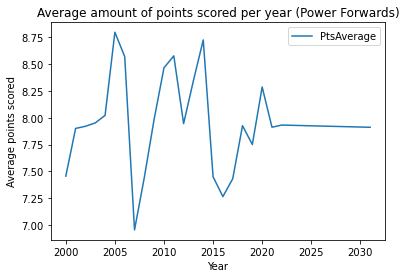

In [276]:
final_PF = total_PF.plot(x = "Yr", y = "PtsAverage")
final_PF.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Power Forwards)")

In [277]:
# Alternate data 

nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints4_alt = result4_alt.predict(n)

In [278]:
predicted4_alt = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints4_alt})
predicted4_alt

,Yr,PtsAverage
0,2022.0,7.637859
1,2023.0,7.581001
2,2024.0,7.524143
3,2025.0,7.467285
4,2026.0,7.410426
5,2027.0,7.353568
6,2028.0,7.296710
7,2029.0,7.239852
8,2030.0,7.182994
9,2031.0,7.126136


In [279]:
total_PF2 = pd.merge(new_PF, predicted4_alt, how = "outer")
total_PF2

,Yr,PtsAverage
0,2000.0,7.455670
1,2001.0,7.901124
2,2002.0,7.920930
3,2003.0,7.952439
4,2004.0,8.022449
5,2005.0,8.798837
6,2006.0,8.571591
7,2007.0,6.953704
8,2008.0,7.444681
9,2009.0,7.987778


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Power Forwards) - Alternate Version')]

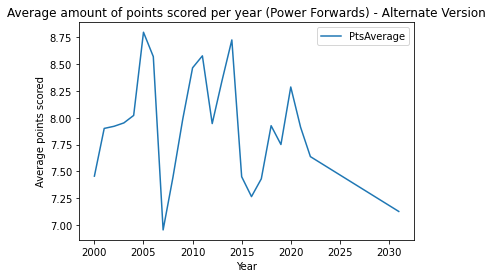

In [280]:
final_PF2 = total_PF2.plot(x = "Yr", y = "PtsAverage")
final_PF2.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Power Forwards) - Alternate Version")

In [80]:
# Centers only

allstats_C = all_stats[all_stats["Pos"] == "C"]
allstats_C.head()

,Year,Player,Pos,Tm,PtsAverage
5,2000.0,John Amaechi,C,ORL,10.4
10,2000.0,Chris Anstey,C,CHI,6.0
16,2000.0,Isaac Austin,C,WAS,6.7
20,2000.0,Vin Baker,C,SEA,16.6
26,2000.0,Tony Battie,C,BOS,6.6


In [81]:
describe_C = allstats_C.groupby("Year")["PtsAverage"].describe()
describe_C

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000.0,87.0,6.413793,5.204541,0.7,2.250,5.40,9.050,29.7
2001.0,92.0,5.917391,4.546406,0.3,2.725,4.60,8.325,28.7
2002.0,99.0,6.021212,4.733322,0.8,2.650,4.80,7.850,27.2
2003.0,101.0,5.753465,4.062944,0.0,3.300,4.90,7.200,27.5
2004.0,93.0,5.575269,4.199551,0.0,2.900,4.50,7.800,21.8
2005.0,101.0,5.687129,4.687017,0.2,2.300,4.50,7.700,26.0
2006.0,99.0,5.493939,4.454688,0.0,2.350,4.70,6.900,22.5
2007.0,94.0,6.845745,5.987364,0.0,2.300,4.90,9.750,25.0
2008.0,99.0,6.751515,5.859657,0.0,2.100,4.80,9.600,25.2


Text(0, 0.5, 'Average points')

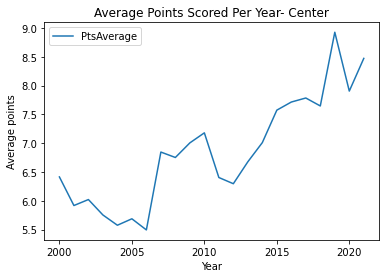

In [82]:
average_C = allstats_C.groupby("Year").mean()
c = average_C.plot()
c.set_title("Average Points Scored Per Year- Center")
c.set_xlabel("Year")
c.set_ylabel("Average points")

In [281]:
# Plotting a regression line/best fit line for the center data 

x = np.array(allstats_C["Year"])
y = np.array(allstats_C["PtsAverage"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))

Slope: 0.12875772232672583; intercept: -252.0123417206497


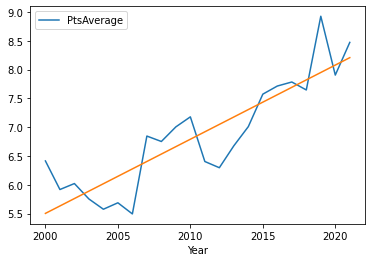

In [282]:
average_C.plot()
plt.plot(x, m * x + b)

In [283]:
years = np.linspace(2000, 2021, 22)
new_C = pd.DataFrame({"Yr": years, "PtsAverage": average_C["PtsAverage"]})
new_C

,Yr,PtsAverage
Year,,
2000.0,2000.0,6.413793
2001.0,2001.0,5.917391
2002.0,2002.0,6.021212
2003.0,2003.0,5.753465
2004.0,2004.0,5.575269
2005.0,2005.0,5.687129
2006.0,2006.0,5.493939
2007.0,2007.0,6.845745
2008.0,2008.0,6.751515


In [284]:
# Linear regression using statsmodels for centers

X = new_C["Yr"]
Y = new_C["PtsAverage"]
X = sm.add_constant(X)
model5 = sm.OLS(Y, X)
result5 = model5.fit()

In [285]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     59.92
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.93e-07
Time:                        19:05:58   Log-Likelihood:                -14.534
No. Observations:                  22   AIC:                             33.07
Df Residuals:                      20   BIC:                             35.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -250.1007     33.196     -7.534      0.000    -319.347    -180.855
Yr             0.1278      0.017      7.741      0.000       0.093       0.162
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.384
Skew:                           0.172   Prob(JB):                        0.825
Kurtosis:                       2.451   Cond. No.                     6.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [286]:
new_C2 = new_C[new_C["Yr"] >= 2010]
new_C2

,Yr,PtsAverage
Year,,
2010.0,2010.0,7.179121
2011.0,2011.0,6.403922
2012.0,2012.0,6.296000
2013.0,2013.0,6.676596
2014.0,2014.0,7.009677
2015.0,2015.0,7.573256
2016.0,2016.0,7.714286
2017.0,2017.0,7.784375
2018.0,2018.0,7.646226


In [287]:
# Linear regression using statsmodels for centers - alternate version

X = new_C2["Yr"]
Y = new_C2["PtsAverage"]
X = sm.add_constant(X)
model5_alt = sm.OLS(Y, X)
result5_alt = model5_alt.fit()

In [288]:
result5_alt.summary()

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PtsAverage   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     25.50
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           0.000499
Time:                        19:08:07   Log-Likelihood:                -6.1519
No. Observations:                  12   AIC:                             16.30
Df Residuals:                      10   BIC:                             17.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -369.2216     74.596     -4.950      0.001    -535.431    -203.012
Yr             0.1869      0.037      5.050      0.000       0.104       0.269
==============================================================================
Omnibus:                        2.500   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.495
Skew:                           0.846   Prob(JB):                        0.474
Kurtosis:                       2.642   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints5 = result5.predict(n)

In [290]:
predicted5 = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints5})
predicted5

,Yr,PtsAverage
0,2022.0,8.335784
1,2023.0,8.463596
2,2024.0,8.591409
3,2025.0,8.719221
4,2026.0,8.847033
5,2027.0,8.974846
6,2028.0,9.102658
7,2029.0,9.230470
8,2030.0,9.358282
9,2031.0,9.486095


In [291]:
# Merging the predicted output with the previous dataframe

total_C = pd.merge(new_C, predicted5, how = "outer")
total_C

,Yr,PtsAverage
0,2000.0,6.413793
1,2001.0,5.917391
2,2002.0,6.021212
3,2003.0,5.753465
4,2004.0,5.575269
5,2005.0,5.687129
6,2006.0,5.493939
7,2007.0,6.845745
8,2008.0,6.751515
9,2009.0,7.005102


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Centers)')]

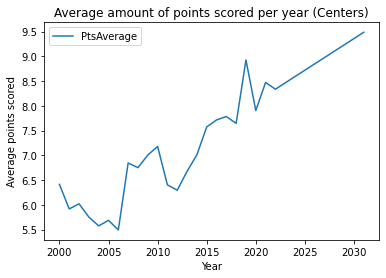

In [292]:
final_C = total_C.plot(x = "Yr", y = "PtsAverage")
final_C.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Centers)")

In [293]:
# Alternate data

nextyears = np.linspace(2022, 2031, 10)
n = sm.add_constant(nextyears)
nextpoints5_alt = result5_alt.predict(n)

In [294]:
predicted5_alt = pd.DataFrame({"Yr": nextyears, "PtsAverage": nextpoints5_alt})
predicted5_alt

,Yr,PtsAverage
0,2022.0,8.680333
1,2023.0,8.867228
2,2024.0,9.054123
3,2025.0,9.241018
4,2026.0,9.427913
5,2027.0,9.614808
6,2028.0,9.801703
7,2029.0,9.988598
8,2030.0,10.175493
9,2031.0,10.362389


In [295]:
total_C2 = pd.merge(new_C, predicted5_alt, how = "outer")
total_C2

,Yr,PtsAverage
0,2000.0,6.413793
1,2001.0,5.917391
2,2002.0,6.021212
3,2003.0,5.753465
4,2004.0,5.575269
5,2005.0,5.687129
6,2006.0,5.493939
7,2007.0,6.845745
8,2008.0,6.751515
9,2009.0,7.005102


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average points scored'),
 Text(0.5, 1.0, 'Average amount of points scored per year (Centers) - Alternate Version')]

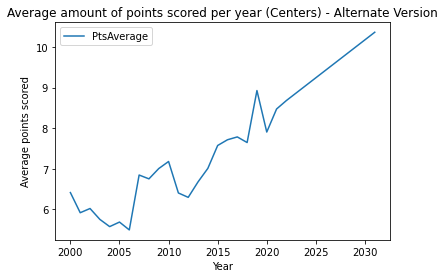

In [296]:
final_C2 = total_C2.plot(x = "Yr", y = "PtsAverage")
final_C2.set(xlabel = "Year", ylabel = "Average points scored", 
             title = "Average amount of points scored per year (Centers) - Alternate Version")

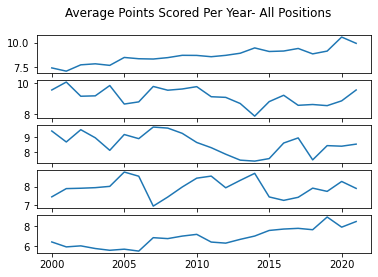

In [39]:
fig, axs = plt.subplots(5)
fig.suptitle("Average Points Scored Per Year- All Positions")
axs[0].plot(average_PG)
axs[1].plot(average_SG)
axs[2].plot(average_SF)
axs[3].plot(average_PF)
axs[4].plot(average_C)